In [1]:
!pip install pandas matplotlib seaborn scikit-learn #package installed

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd          #Libraries loaded
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
test_data = pd.read_csv("test.csv")          #datasets loaded
train_data = pd.read_csv("train.csv")

In [11]:
print(test_data.info())
print(test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None
                  ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2358.000000  2514.000000
mean   463433.918919    43.649791         2.552587     2.825378
std      2618.245698    16.967015         3.341094     1.551906
min    458989.00

In [63]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696 

In [13]:
print(test_data.isnull().sum())   #missing values checked

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [55]:
print(test_data.columns.tolist())

['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']


In [131]:
test_data.columns = test_data.columns.str.strip()


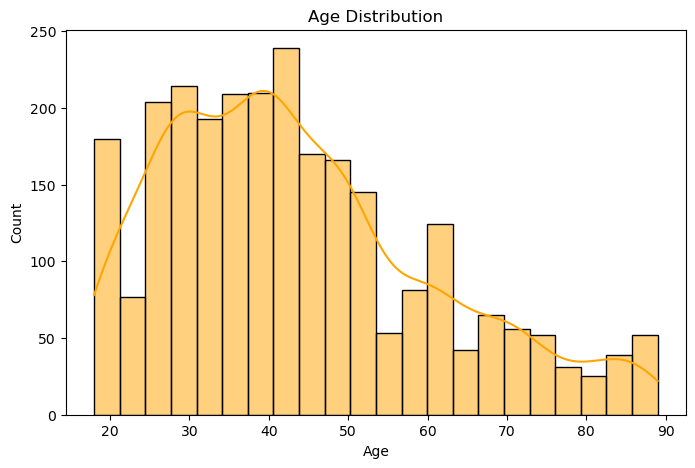

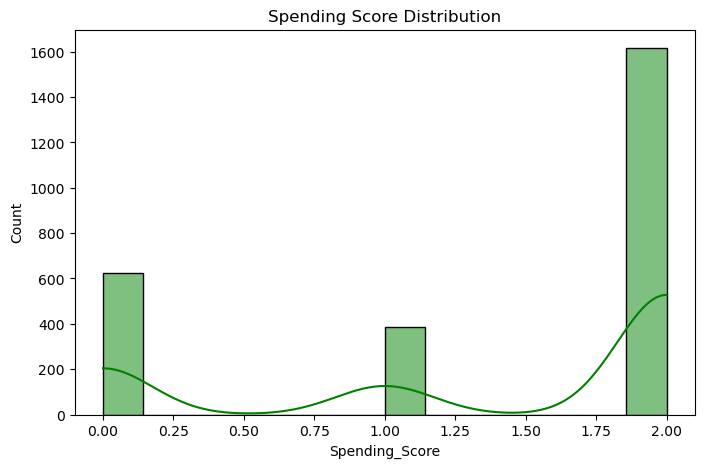

In [141]:
plt.figure(figsize=(8, 5))                 #Distribution plots
sns.histplot(test_data['Age'], kde=True, color='orange')
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(test_data['Spending_Score'], kde=True, color='green')
plt.title("Spending Score Distribution")
plt.show()

C:\Users\viraj\AppData\Local\Temp\ipykernel_38324\2228716359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_data, x='Gender', palette='pastel') #Gender Distribution


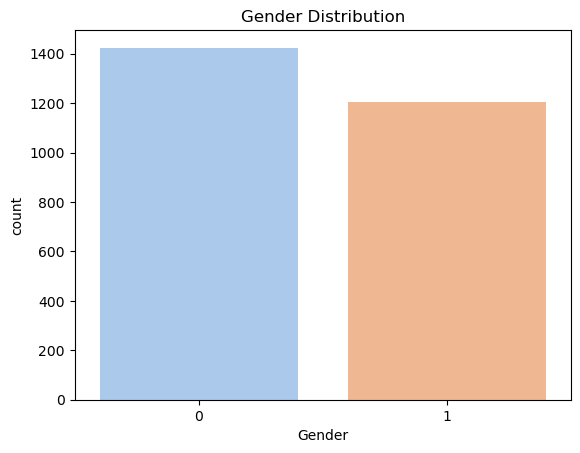

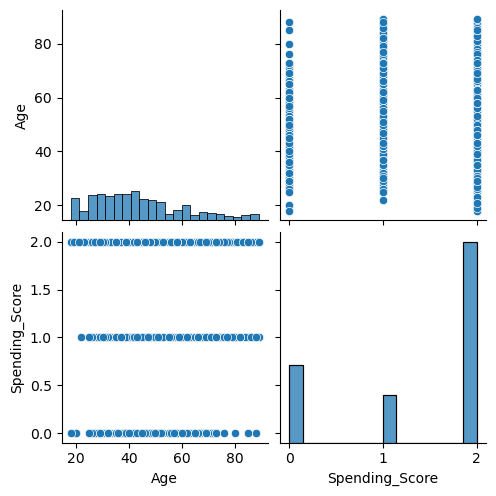

In [143]:
sns.countplot(data=test_data, x='Gender', palette='pastel') #Gender Distribution
plt.title("Gender Distribution")
plt.show()
sns.pairplot(test_data[['Age', 'Spending_Score']])  #Pairplot to see relationships
plt.show()


In [75]:
print(test_data.dtypes)

ID                   int64
Gender               int64
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object


In [77]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()

In [81]:
for col in test_data.select_dtypes(include='object').columns:
    test_data[col] = le.fit_transform(test_data[col])

In [83]:
from sklearn.preprocessing import StandardScaler

In [85]:
features = test_data.select_dtypes(include='number')


In [87]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [89]:
from sklearn.cluster import KMeans      #Kmeans Clustering
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
features_clean = features.dropna()

In [95]:
scaled_features = scaler.fit_transform(features_clean)

In [97]:
from sklearn.cluster import KMeans

In [99]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

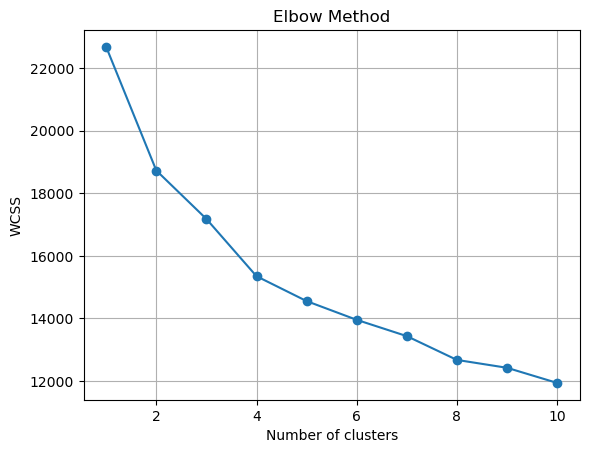

In [101]:
plt.plot(range(1, 11), wcss, marker='o')   # Plot elbow graph
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [117]:
print(test_data.shape[0])  # Number of rows in test_data
print(scaled_features.shape[0]) 

2627
2267


In [119]:
scaled_features = scaler.fit_transform(test_data[['Age', 'Spending_Score']]) 
assert scaled_features.shape[0] == test_data.shape[0], "Mismatch in rows"

In [121]:
test_data_subset = test_data.iloc[:scaled_features.shape[0]]
test_data_subset['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\viraj\AppData\Local\Temp\ipykernel_38324\3257581904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_subset['Cluster'] = kmeans.fit_predict(scaled_features)


In [123]:
kmeans = KMeans(n_clusters=4, random_state=42) # Let's assume optimal clusters = 4
test_data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


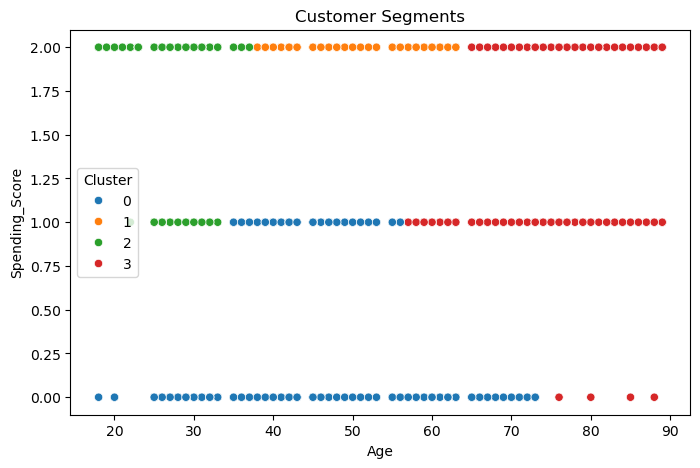

In [125]:
plt.figure(figsize=(8, 5)) # Visualization of clusters
sns.scatterplot(data=test_data, x='Age', y='Spending_Score', hue='Cluster', palette='tab10')
plt.title('Customer Segments')
plt.show()

In [127]:
summary = test_data.groupby('Cluster').mean() # Summary by cluster
print(summary)

summary.to_csv("cluster_summary.csv")

                    ID    Gender  Ever_Married        Age  Graduated  \
Cluster                                                                
0        463606.390117  0.412224      1.020806  46.737321   0.743823   
1        463252.331541  0.512545      0.551971  46.722222   0.792115   
2        463484.715197  0.470776      0.190223  27.589798   0.434644   
3        463213.573816  0.437326      0.969359  74.356546   0.632312   

         Profession  Work_Experience  Spending_Score  Family_Size     Var_1  
Cluster                                                                      
0          1.824447         2.345376        0.192458     3.179283  4.167750  
1          1.991039         2.773438        2.000000     1.960152  4.247312  
2          3.552604         3.073113        1.972370     3.324355  3.930925  
3          5.077994         1.209150        1.387187     2.081633  4.610028  
